# Finance Data Project

In this data project we will focus on exploratory data analysis of stock prices.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Muskaan\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Data

We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html). Use Yahoo finance as a source, for example:**

    # For using any other api you can use data reader
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)



### USED YAHOO FINANCE TO GET BANK DATA

In [4]:
start = datetime.datetime(2006, 1, 1)

In [5]:
end = datetime.datetime(2016, 1, 1)

In [6]:
# Bank of America
BAC = yf.download('BAC', start=start, end=end)

# Citi Group
C = yf.download('C', start=start, end=end)

# Goldman Sachs
GS = yf.download('GS', start=start, end=end)

# JPMorgan Chase
JPM = yf.download('JPM', start=start, end=end)

# Morgan Stanley
MS = yf.download('MS', start=start, end=end)

# Wells Fargo
WFC = yf.download('WFC', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [9]:
bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  32.168697  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  31.827055  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  31.868052  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  31.820227  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  31.840736  15619400   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  33.259640  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  33.282455  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  33.373714  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  33.407955  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  33.761597  4144500  31.674999  31.825001  31.555000   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.234491  11016400  
2006-01-04  31.530001  19.011400  10870000  
2006-01-05  31.495001  18.990292  10158000  
2006-01-06  31.680000  19.101843   8403800  
2006-01-09  31.674999  19.098824   5619600  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [11]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.168697  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.827055  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.868052  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.820227  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.840736  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.259640  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  33.282455  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.373714  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.407955  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  33.761597  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.234491  11016400  
2006-01-04   31.530001  19.011400  10870000  
2006-01-05   31.495001  18.990292  10158000  
2006-01-06   31.680000  19.101843   8403800  
2006-01-09   31.674999  19.098824   5619600  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and Using .loc
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** Max Close price for each bank's stock throughout the time period**

In [12]:
# Another method without using xs
# for tick in tickers:
  # print(tick, bank_stocks[tick]['Close'].max())

# Using xs

bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [14]:
for tick in tickers:
  returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [15]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

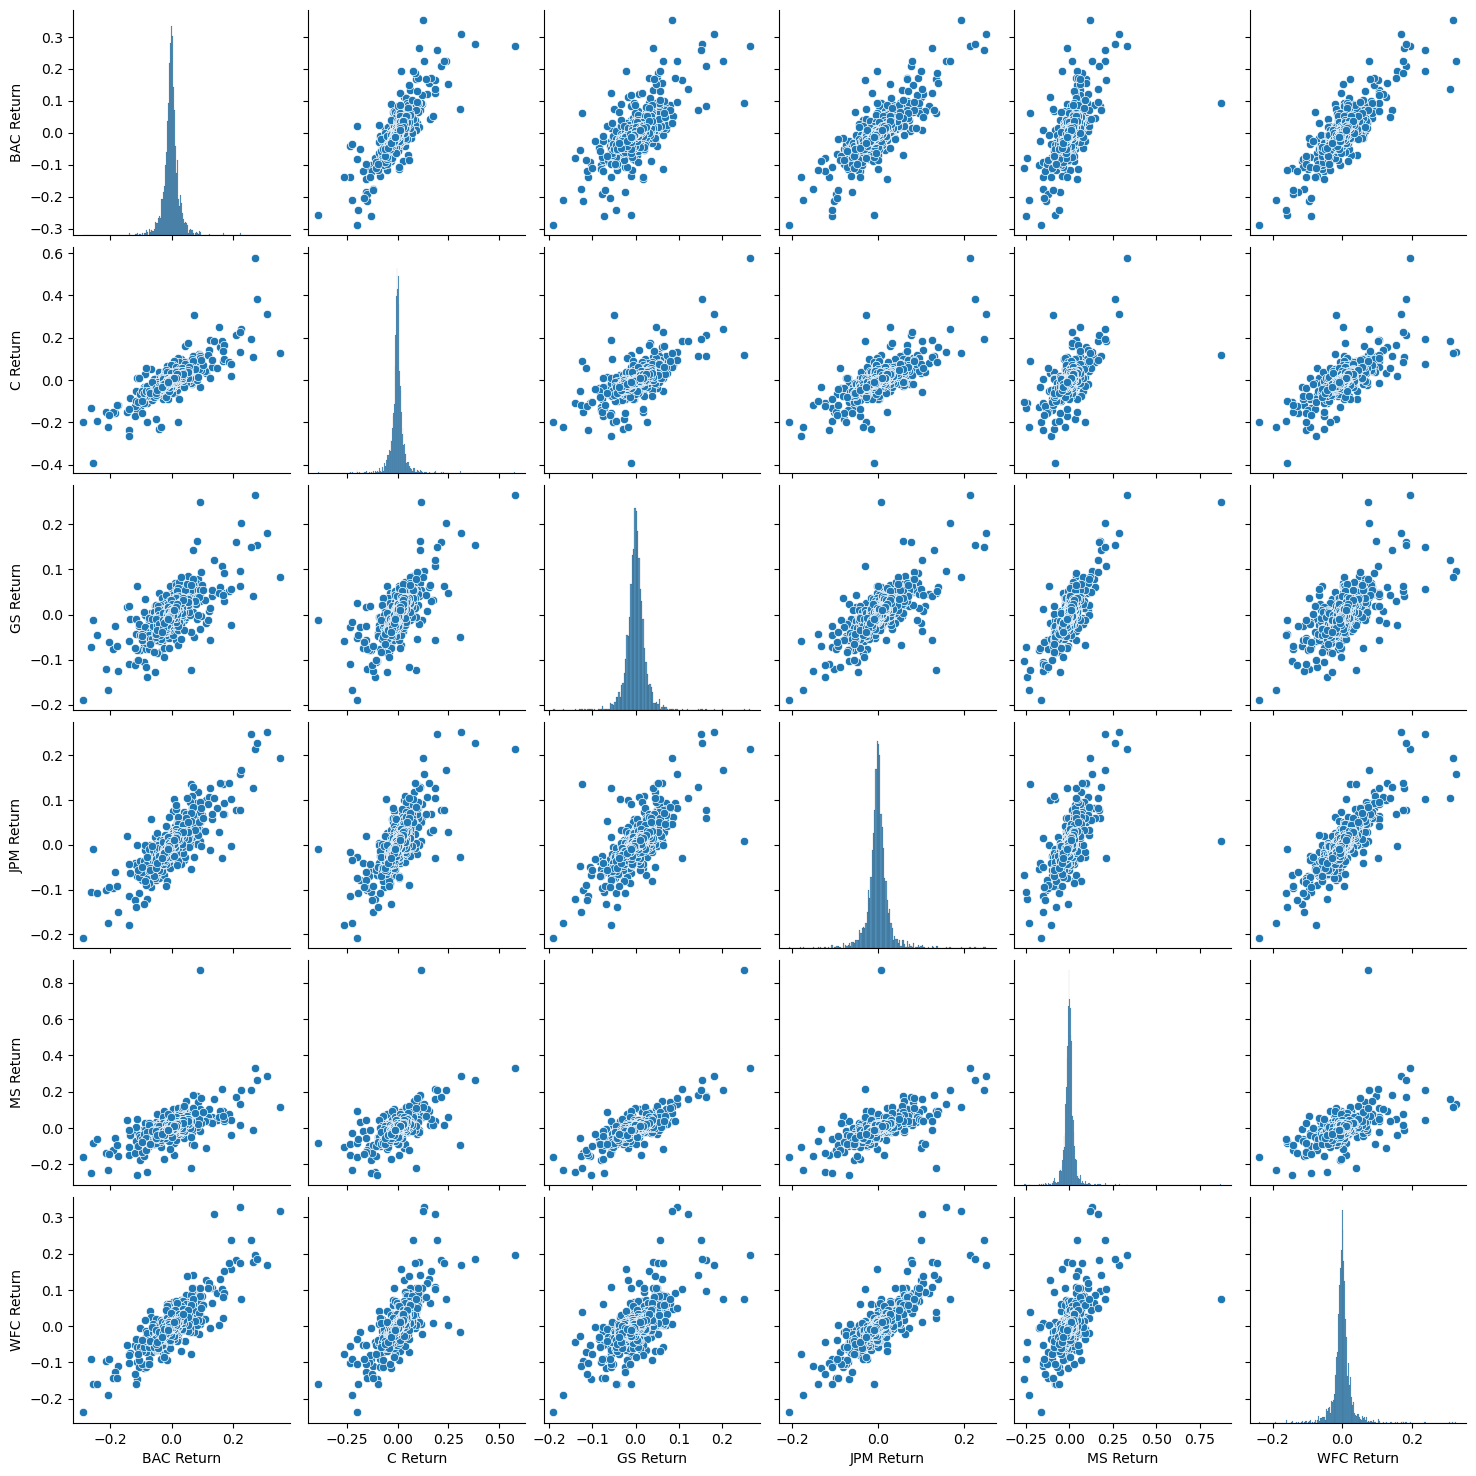

In [16]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [17]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [18]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [19]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [20]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

c:\Users\Muskaan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

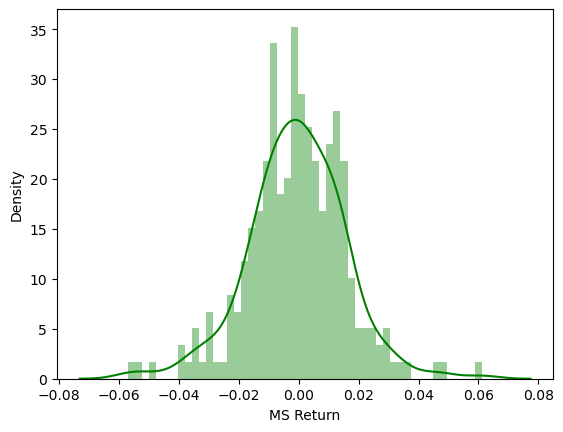

In [21]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

c:\Users\Muskaan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

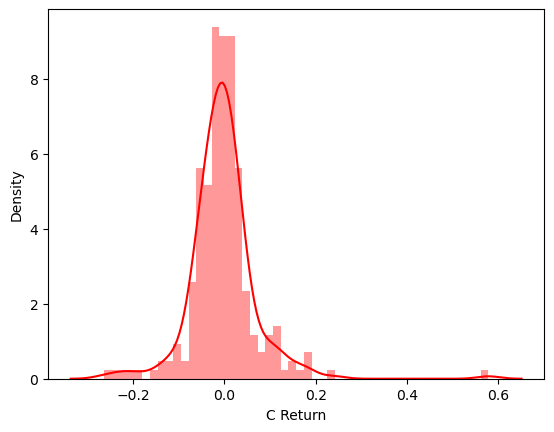

In [22]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50)

____
### Imports

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

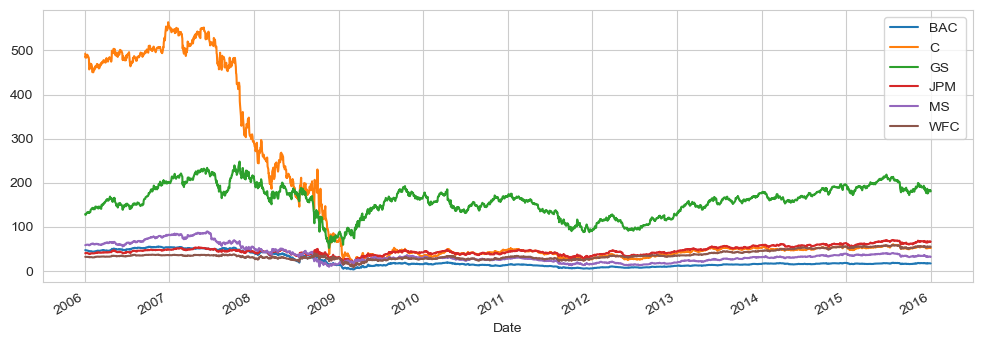

In [24]:
for tick in tickers:
  bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()

using .xs

<AxesSubplot:xlabel='Date'>

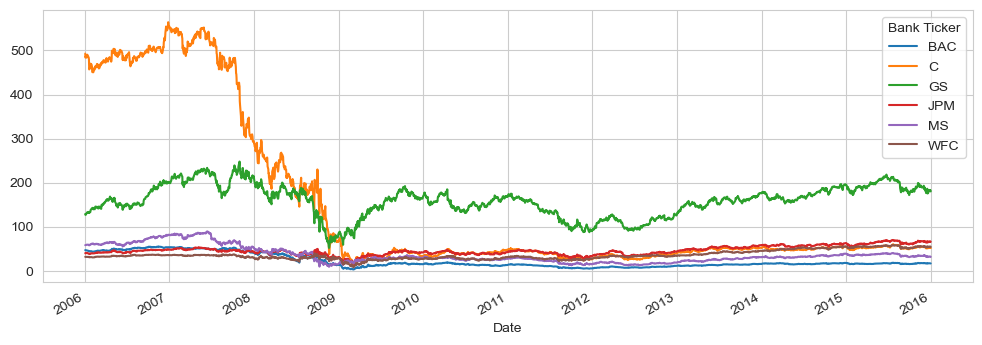

In [25]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(label=tick, figsize=(12,4))

Using Plotly

In [26]:
# import plotly.io as pio
# pio.renderers.default = 'colab'

In [27]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008.

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

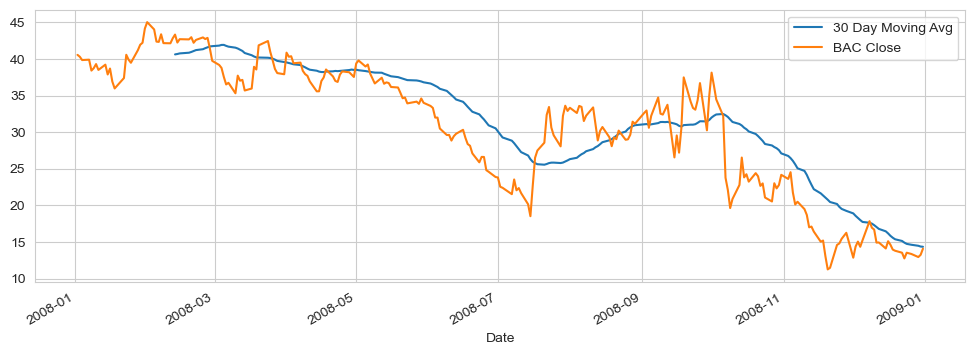

In [28]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Moving Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [29]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

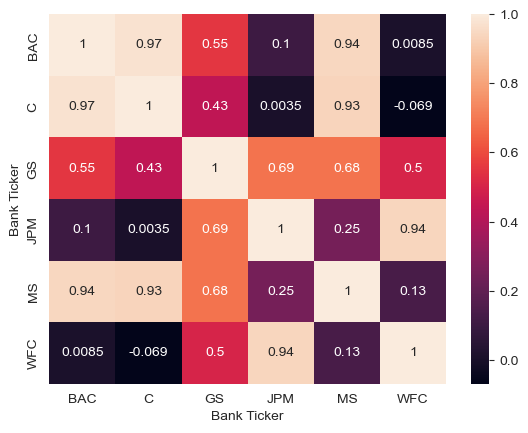

In [30]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

In [31]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


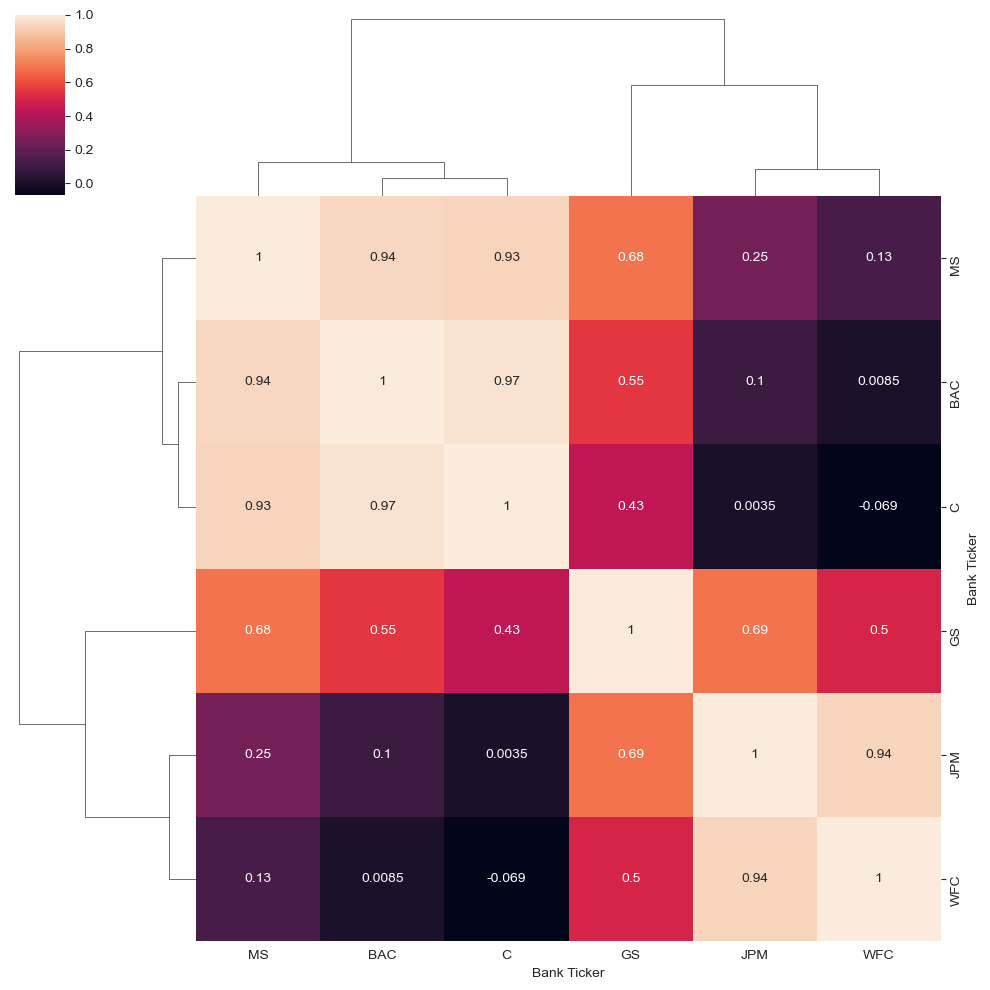

In [32]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

In [33]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


In [34]:
close_corr.iplot(kind='heatmap')

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [35]:
bac15 = BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

MS['Close'] representing the closing prices of Morgan Stanley stock within the specified date range. The ta_plot() function is then used to plot three Simple Moving Averages (SMAs) with periods of 13, 21, and 55 on those closing prices. This visualization aids in technical analysis to identify trends and potential trading signals in Morgan Stanley's stock price movements over those periods.

SMA is a widely used tool in technical analysis for smoothing out price data and identifying trends in financial markets.

In [36]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

plot will be based on Bollinger Bands. Bollinger Bands are a volatility indicator that consists of a middle band being a Simple Moving Average (SMA) and upper and lower bands being a certain number of standard deviations away from the SMA. The distance between the upper and lower bands widens as volatility increases and narrows as volatility decreases. Bollinger Bands are often used to identify overbought or oversold conditions and potential trend reversals.

In [37]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')